In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.model_selection import train_test_split
from numpy.random import rand
from sklearn.preprocessing import StandardScaler,Normalizer
import random

##making appropriate data

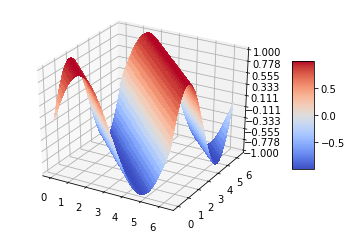

In [ ]:
X, Y = np.linspace(0,2*pi,num=100).reshape(100,1),np.linspace(0,2*pi,num=100).reshape(100,1)
X,Y = np.meshgrid(X,Y)
F = np.sin(X+Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
space = np.linspace(0,2*pi,100)
data = [[space[i],space[j]] for i in range(100) for j in range(100)]
label = [np.sin(data[i][0]+data[i][1]) for i in range(len(data))]
scaler = Normalizer()
data = scaler.fit_transform(data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)


##defining necessary functions for network

In [ ]:
relu = lambda x : x if x > 0 else 0
relu = np.vectorize(relu)
relu_derivative = lambda x : 1 if x > 0 else 0
relu_derivative = np.vectorize(relu_derivative)
tanh_derivative = lambda x : (1-np.square(np.tanh(x)))
l2_cost = lambda y_true, y_predict : 1/2*np.sum(np.square(np.array(y_true)-np.array(y_predict)))
l2_cost_derivative = lambda y_true, y_pred : np.array(y_true) - np.array(y_pred)

##neural network code

In [ ]:
class net():
  def __init__(self,neuron = 5):
    self.neuron = neuron
    self.b1 = (rand(1, neuron)-0.5).reshape(1,neuron)/10
    self.b2 = (rand()-0.5)/10
    self.w1 = (rand(2,neuron)-0.5).reshape(2, neuron)/10
    self.w2 = (rand(neuron, 1)-0.5)/10
  
  def train(self,train_x, train_y, epochs = 100, alpha = 0.01):
    train_len = len(train_x)

    for i in range(epochs):
      #forward propagation
      idx = random.sample(range(train_len),1)[0]
      z = np.tanh(np.dot(train_x[idx], self.w1)+self.b1)[0]
      out = (np.dot(z,self.w2) + self.b2)[0]

      
      zprime = tanh_derivative(z)
      #backward propagation
      db2 =  alpha*(train_y[idx] - out)
      self.b2 -= db2
      for i in range(self.neuron):
        self.w2[i] -= db2*z[i]
      db1 = np.zeros(self.neuron)
      dw1 = np.zeros((self.neuron,2))
      for i in range(self.neuron):
        db1[i] = db2*self.w2[i][0]*zprime[i]
        dw1[i][0] = db1[i]*train_x[idx][0]
        dw1[i][1] = db1[i]*train_x[idx][1]
      self.b1 -= db1.T
      self.w1 -= dw1.T
      
  def predict(self, test_x):
    test_len = len(test_x)
    y_pred = np.zeros(test_len)
    for i in range(test_len):
      z = np.tanh(np.dot(test_x[i], self.w1)+self.b1)[0]
      y_pred[i] = (np.dot(z,self.w2) + self.b2)[0]
    return y_pred

In [ ]:
test_net = net(5)
test_net.train(x_train,y_train,epochs = 300,alpha = 0.005)

In [ ]:
x_final_test = [[i,0] for i in space]
y_final_test = [np.sin(x_final_test[i][0] + x_final_test[i][1]) for i in range(len(space))]

## network output

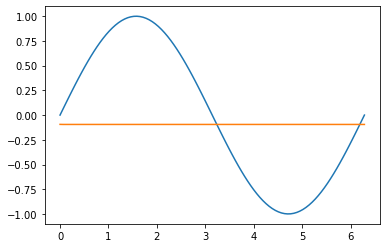

In [ ]:
plt.plot(space, y_final_test)
x_final_test = scaler.transform(x_final_test)
plt.plot(space,test_net.predict(x_final_test))
plt.show()